In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


In [5]:
dataset = pd.read_csv('C:\\Users\\TheAncientOwl\\Code\\data-analysis-tool\\server\\test-data\\linear-regression.salary-data.csv')
dataset.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


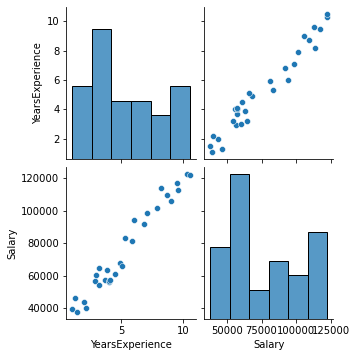

In [9]:
sns.pairplot(dataset)


In [10]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(X)
print()
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.33, random_state=42
)


In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)



LinearRegression()

predict y from lm

In [14]:
y_pred = lr.predict(X_test)


plot graph


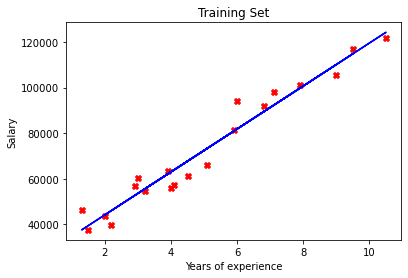

In [16]:
plt.scatter(X_train, y_train, color='red', marker='X')
plt.plot(X_train, lr.predict(X_train), color='blue')
plt.title('Training Set')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()


plt graph for test

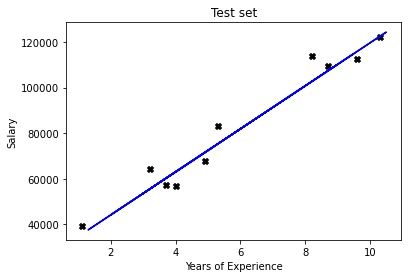

In [17]:
plt.scatter(X_test, y_test, color='black', marker='X')
plt.plot(X_train, lr.predict(X_train), color='blue')
plt.title('Test set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


linear regression equation

In [23]:
# coefficient (slope)
b = lr.coef_

print('Coefficient :', b)

# Y-intercept 
a = lr.intercept_

print('Intercept :', a)

# Equation
print(f'Predicted salary = {b} * (Years of experience) + {a}')

print(lr.predict([[11]]))


Coefficient : [9426.03876907]
Intercept : 25324.33537924433
Predicted salary = [9426.03876907] * (Years of experience) + 25324.33537924433
[129010.76183907]


mean squared error


In [24]:
from sklearn import metrics

print(f'Mean Squared Error (MSE): {metrics.mean_squared_error(y_test, y_pred)}')


Mean Squared Error (MSE): 35301898.887134895


Ordinary Least-Squares (OLS)

In [32]:
import statsmodels.api as sm

X_stat = sm.add_constant(X_train)
regsummary = sm.OLS(y_train, X_stat).fit()
regsummary.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     381.3
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           1.45e-13
Time:                        11:17:06   Log-Likelihood:                -200.48
No. Observations:                  20   AIC:                             405.0
Df Residuals:                      18   BIC:                             406.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.532e+04   2743.538      9.231      0.000    1.96e+04    3.11e+04
x1          9426.0388    482.706     19.527      0.000    8411.911    1.04e+04
==============================================================================
Omnibus:                        0.822   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.819
Skew:                           0.380   Prob(JB):                        0.664
Kurtosis:                       2.363   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Square & Adj-R-Square

In [26]:
print(f'Adjusted R-Square: ', regsummary.rsquared_adj)
print(f'R-Square', regsummary.rsquared)

Adjusted R-Square:  0.9524194554302405
R-Square 0.9549236946181227
